# Aim      :- To see various clustering machine learning
## Dataset :- EastWestAirlines
                The file EastWestAirlines contains information on passengers who belong to an airline’s frequent flier program.
For each passenger the data include information on their mileage history and on different ways they accrued or
spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics
for the purpose of targeting different segments for different types of mileage offe

### Author :- Saikrishna G
### Date   :- 07-07-2024rs.

In [3]:
# Importing the numpy and pandas libabry to load the dataset
#matplotlib for data visualzation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Reading the dataset
Data = pd.read_csv("../../Dataset/EastWestAirlines.csv")

In [6]:
#checking the columns names
Data.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

#### ID :- Unique ID.
#### Balance :- Number of miles eligible for award travel
#### Qual_miles :-Number of miles counted as qualifying for Topflight status
#### cc1_miles :- Number of miles earned with freq. flyer credit card in the past 12 months:
#### cc2_miles :- Number of miles earned with Rewards credit card in the past 12 months:
#### cc3_miles :- Number of miles earned with Small Business credit card in the past 12 months:
#### Bonus_miles :- Number of miles earned from non-flight bonus transactions in the past 12 months
#### Bonus_trans :- Number of non-flight bonus transactions in the past 12 months
#### Flight_miles_12mo :-Number of flight miles in the past 12 months
#### Flight_trans_12 :- Number of flight transactions in the past 12 months
#### Days_since_enroll :- Number of days since enrolled in flier program
#### Award :- Whether that person had award flight (free flight) or not

In [8]:
# checking the data types
Data.dtypes

ID                   int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award                int64
dtype: object

In [9]:
# checking if data loaded correctly or not by inspecting first 5 rows and last 5 rows. 
#compare the last rows in csv and displayed from data.tail method if both are matching then data is loaded with out any issues.
Data.head(5)

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0   1    28143           0          1          1          1          174   
1   2    19244           0          1          1          1          215   
2   3    41354           0          1          1          1         4123   
3   4    14776           0          1          1          1          500   
4   5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
0            1                  0                0               7000      0  
1            2                  0                0               6968      0  
2            4                  0                0               7034      0  
3            1                  0                0               6952      0  
4           26               2077                4               6935      1

In [10]:
Data.tail(5)

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  
3994      1  
3995      1  
3996      1  
3997      0  
3998      0

In [11]:
#checking the data no of features and  instance (rows)
Data.shape

(3999, 12)

In [12]:
#checking the descriptive statstics
Data.describe().T

count          mean            std  min      25%      50%  \
ID                 3999.0   2014.819455    1160.764358  1.0   1010.5   2016.0   
Balance            3999.0  73601.327582  100775.664958  0.0  18527.5  43097.0   
Qual_miles         3999.0    144.114529     773.663804  0.0      0.0      0.0   
cc1_miles          3999.0      2.059515       1.376919  1.0      1.0      1.0   
cc2_miles          3999.0      1.014504       0.147650  1.0      1.0      1.0   
cc3_miles          3999.0      1.012253       0.195241  1.0      1.0      1.0   
Bonus_miles        3999.0  17144.846212   24150.967826  0.0   1250.0   7171.0   
Bonus_trans        3999.0     11.601900       9.603810  0.0      3.0     12.0   
Flight_miles_12mo  3999.0    460.055764    1400.209171  0.0      0.0      0.0   
Flight_trans_12    3999.0      1.373593       3.793172  0.0      0.0      0.0   
Days_since_enroll  3999.0   4118.559390    2065.134540  2.0   2330.0   4096.0   
Award              3999.0      0.370343       0.482957  0.0      0.0      0.0   

                       75%        max  
ID                  3020.5     4021.0  
Balance            92404.0  1704838.0  
Qual_miles             0.0    11148.0  
cc1_miles              3.0        5.0  
cc2_miles              1.0        3.0  
cc3_miles              1.0        5.0  
Bonus_miles        23800.5   263685.0  
Bonus_trans           17.0       86.0  
Flight_miles_12mo    311.0    30817.0  
Flight_trans_12        1.0       53.0  
Days_since_enroll   5790.5     8296.0  
Award                  1.0        1.0

## Initial analysis.
The no of rows is 3999 and all the columns count also 3999 --> there are no null values in the data
Comparing mean and median to tell skewness of data -->
Balance,Qual_miles,cc1_miles,Bonus_miles,Flight_miles_12mo,Flight_trans_12 --> right skewed 
cc2_miles,cc3_miles,Bonus_trans,Days_since_enroll,Award ---> normal distrbuited

we have to apply the normalization as the data is skewed and range also more for some of the columns.

In [14]:
# checking for missing values and na values 
Data.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [15]:
Data.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [16]:
#univariany analysis

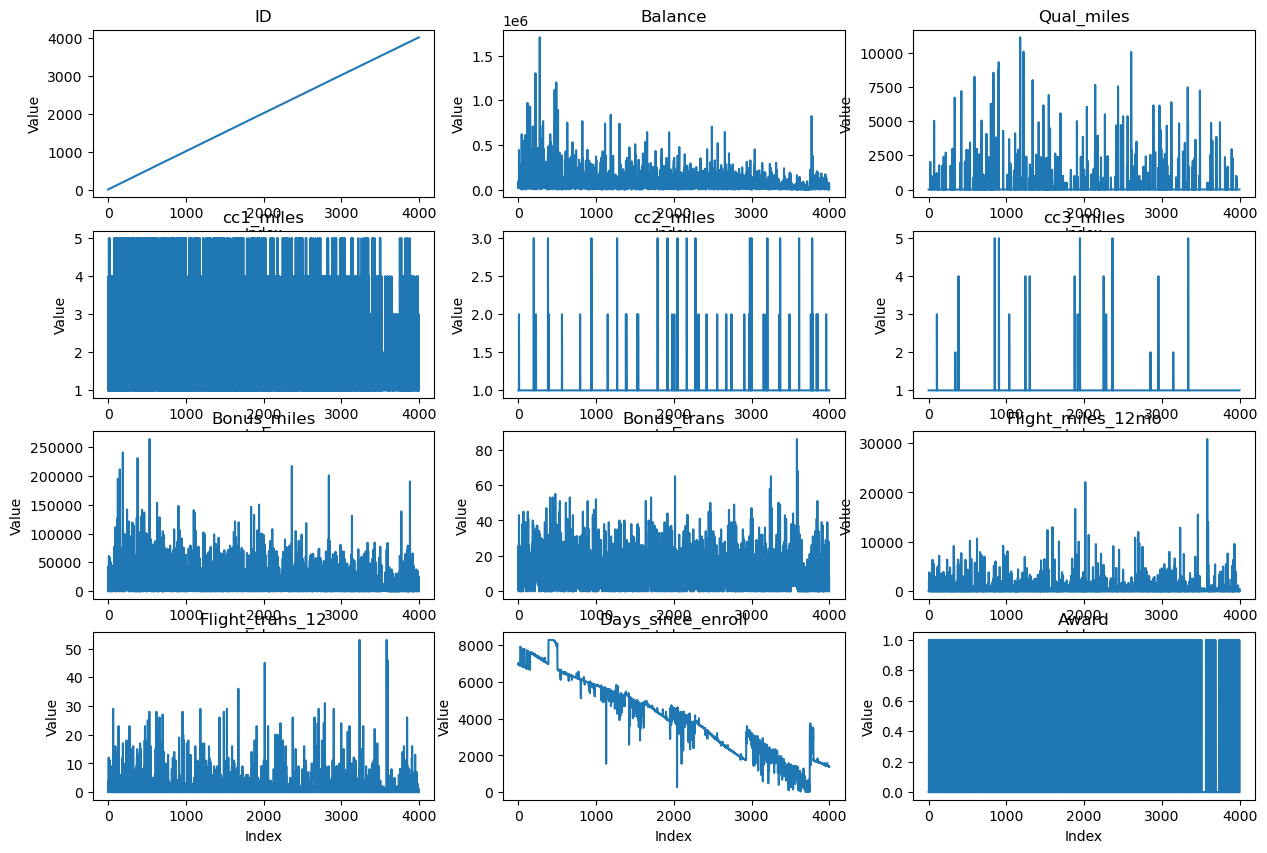

In [17]:
# Set up the plotting environment for 4x3 subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(Data.columns):
    Data[col].plot(kind='line', ax=axes[i], title=col)
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Value')

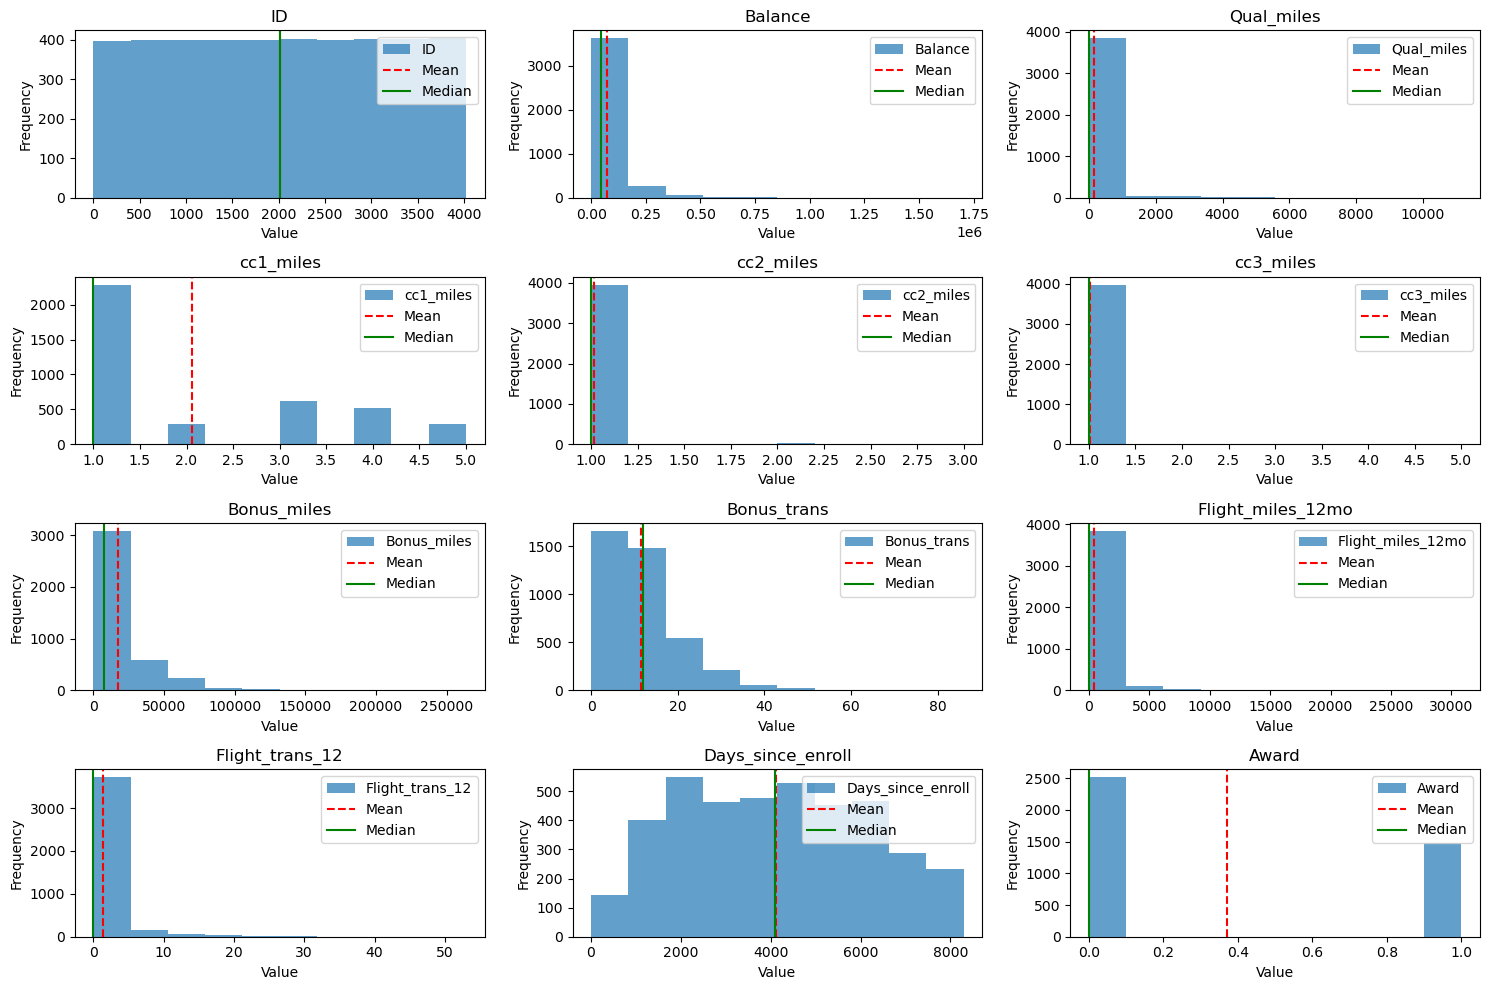

In [18]:
# Set up the plotting environment for 4x3 subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(Data.columns):
    Data[col].plot(kind='hist', ax=axes[i], title=col, bins=10, alpha=0.7)
    mean = Data[col].mean()
    median = Data[col].median()
    axes[i].axvline(mean, color='r', linestyle='--', label='Mean')
    axes[i].axvline(median, color='g', linestyle='-', label='Median')
    axes[i].legend()
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

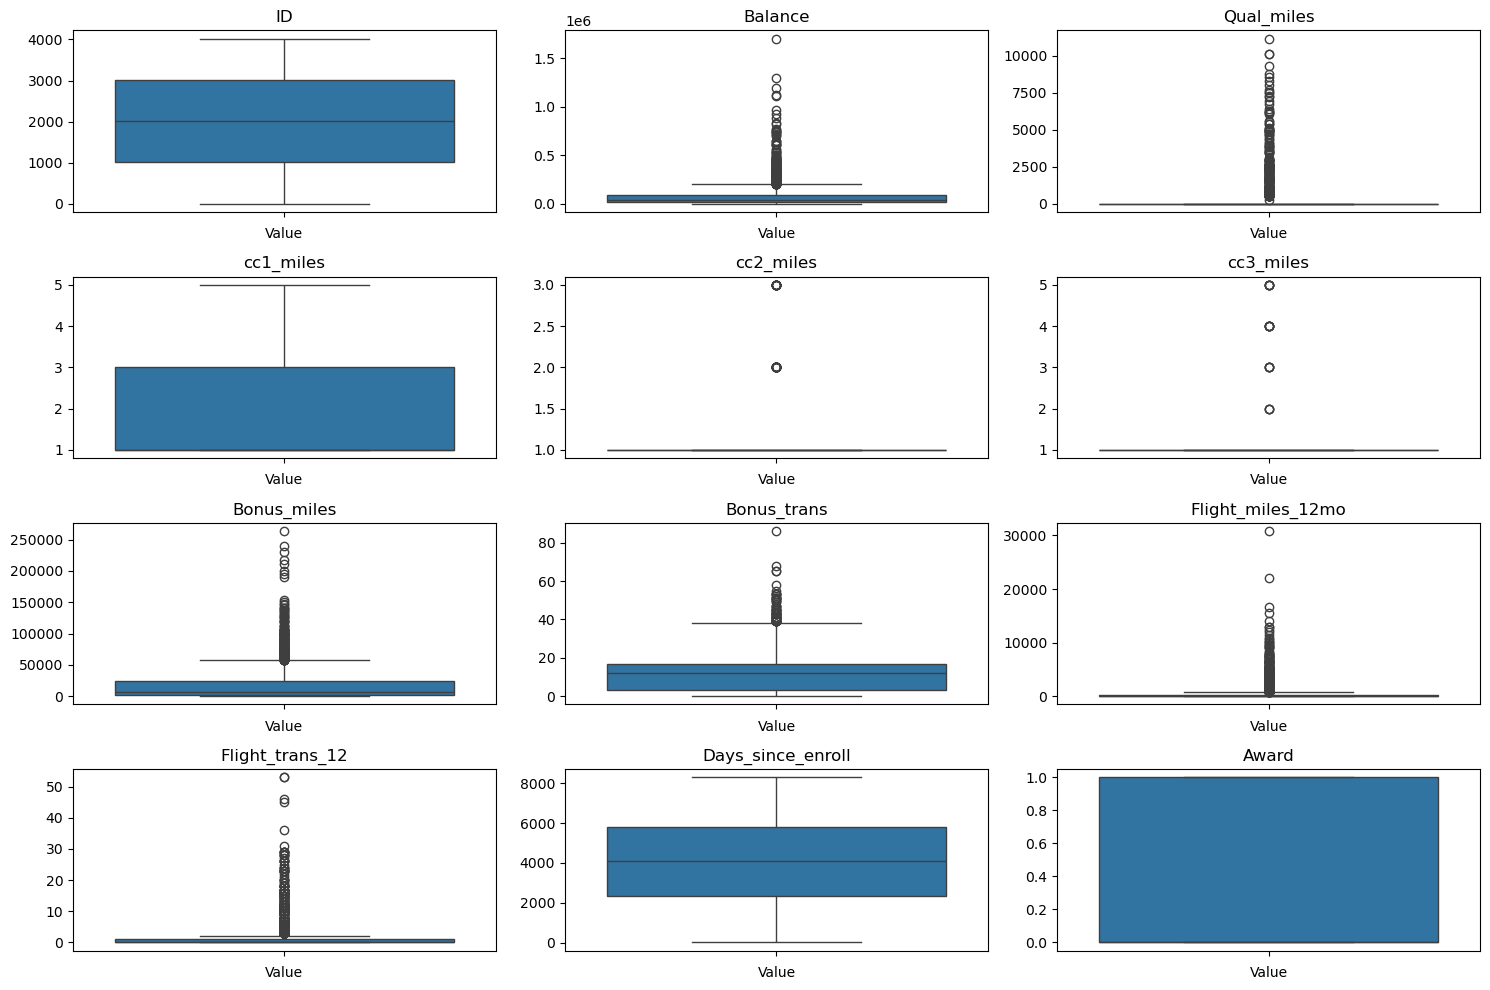

In [19]:
# Set up the plotting environment for 4x3 subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(Data.columns):
    sns.boxplot(Data[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

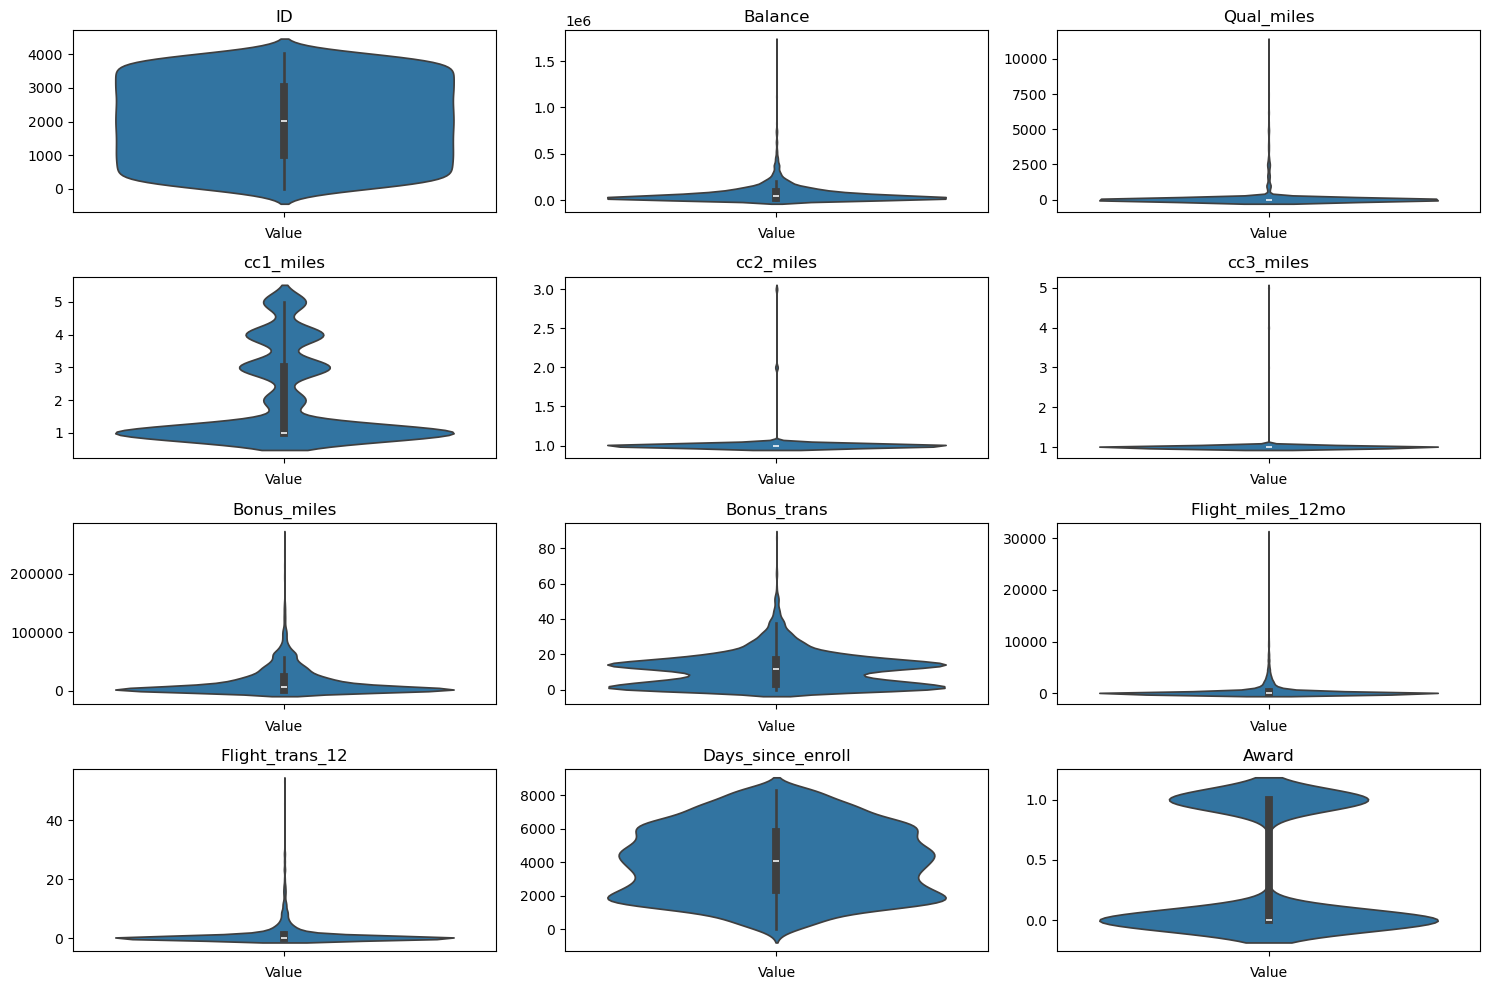

In [20]:
import seaborn as sns
# Set up the plotting environment for 4x3 subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(Data.columns):
    sns.violinplot(Data[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [21]:
# From above plots its clear that data is skewed and outliers are present.
# we will do bi-variant analysis to check the dependent variables in the features.


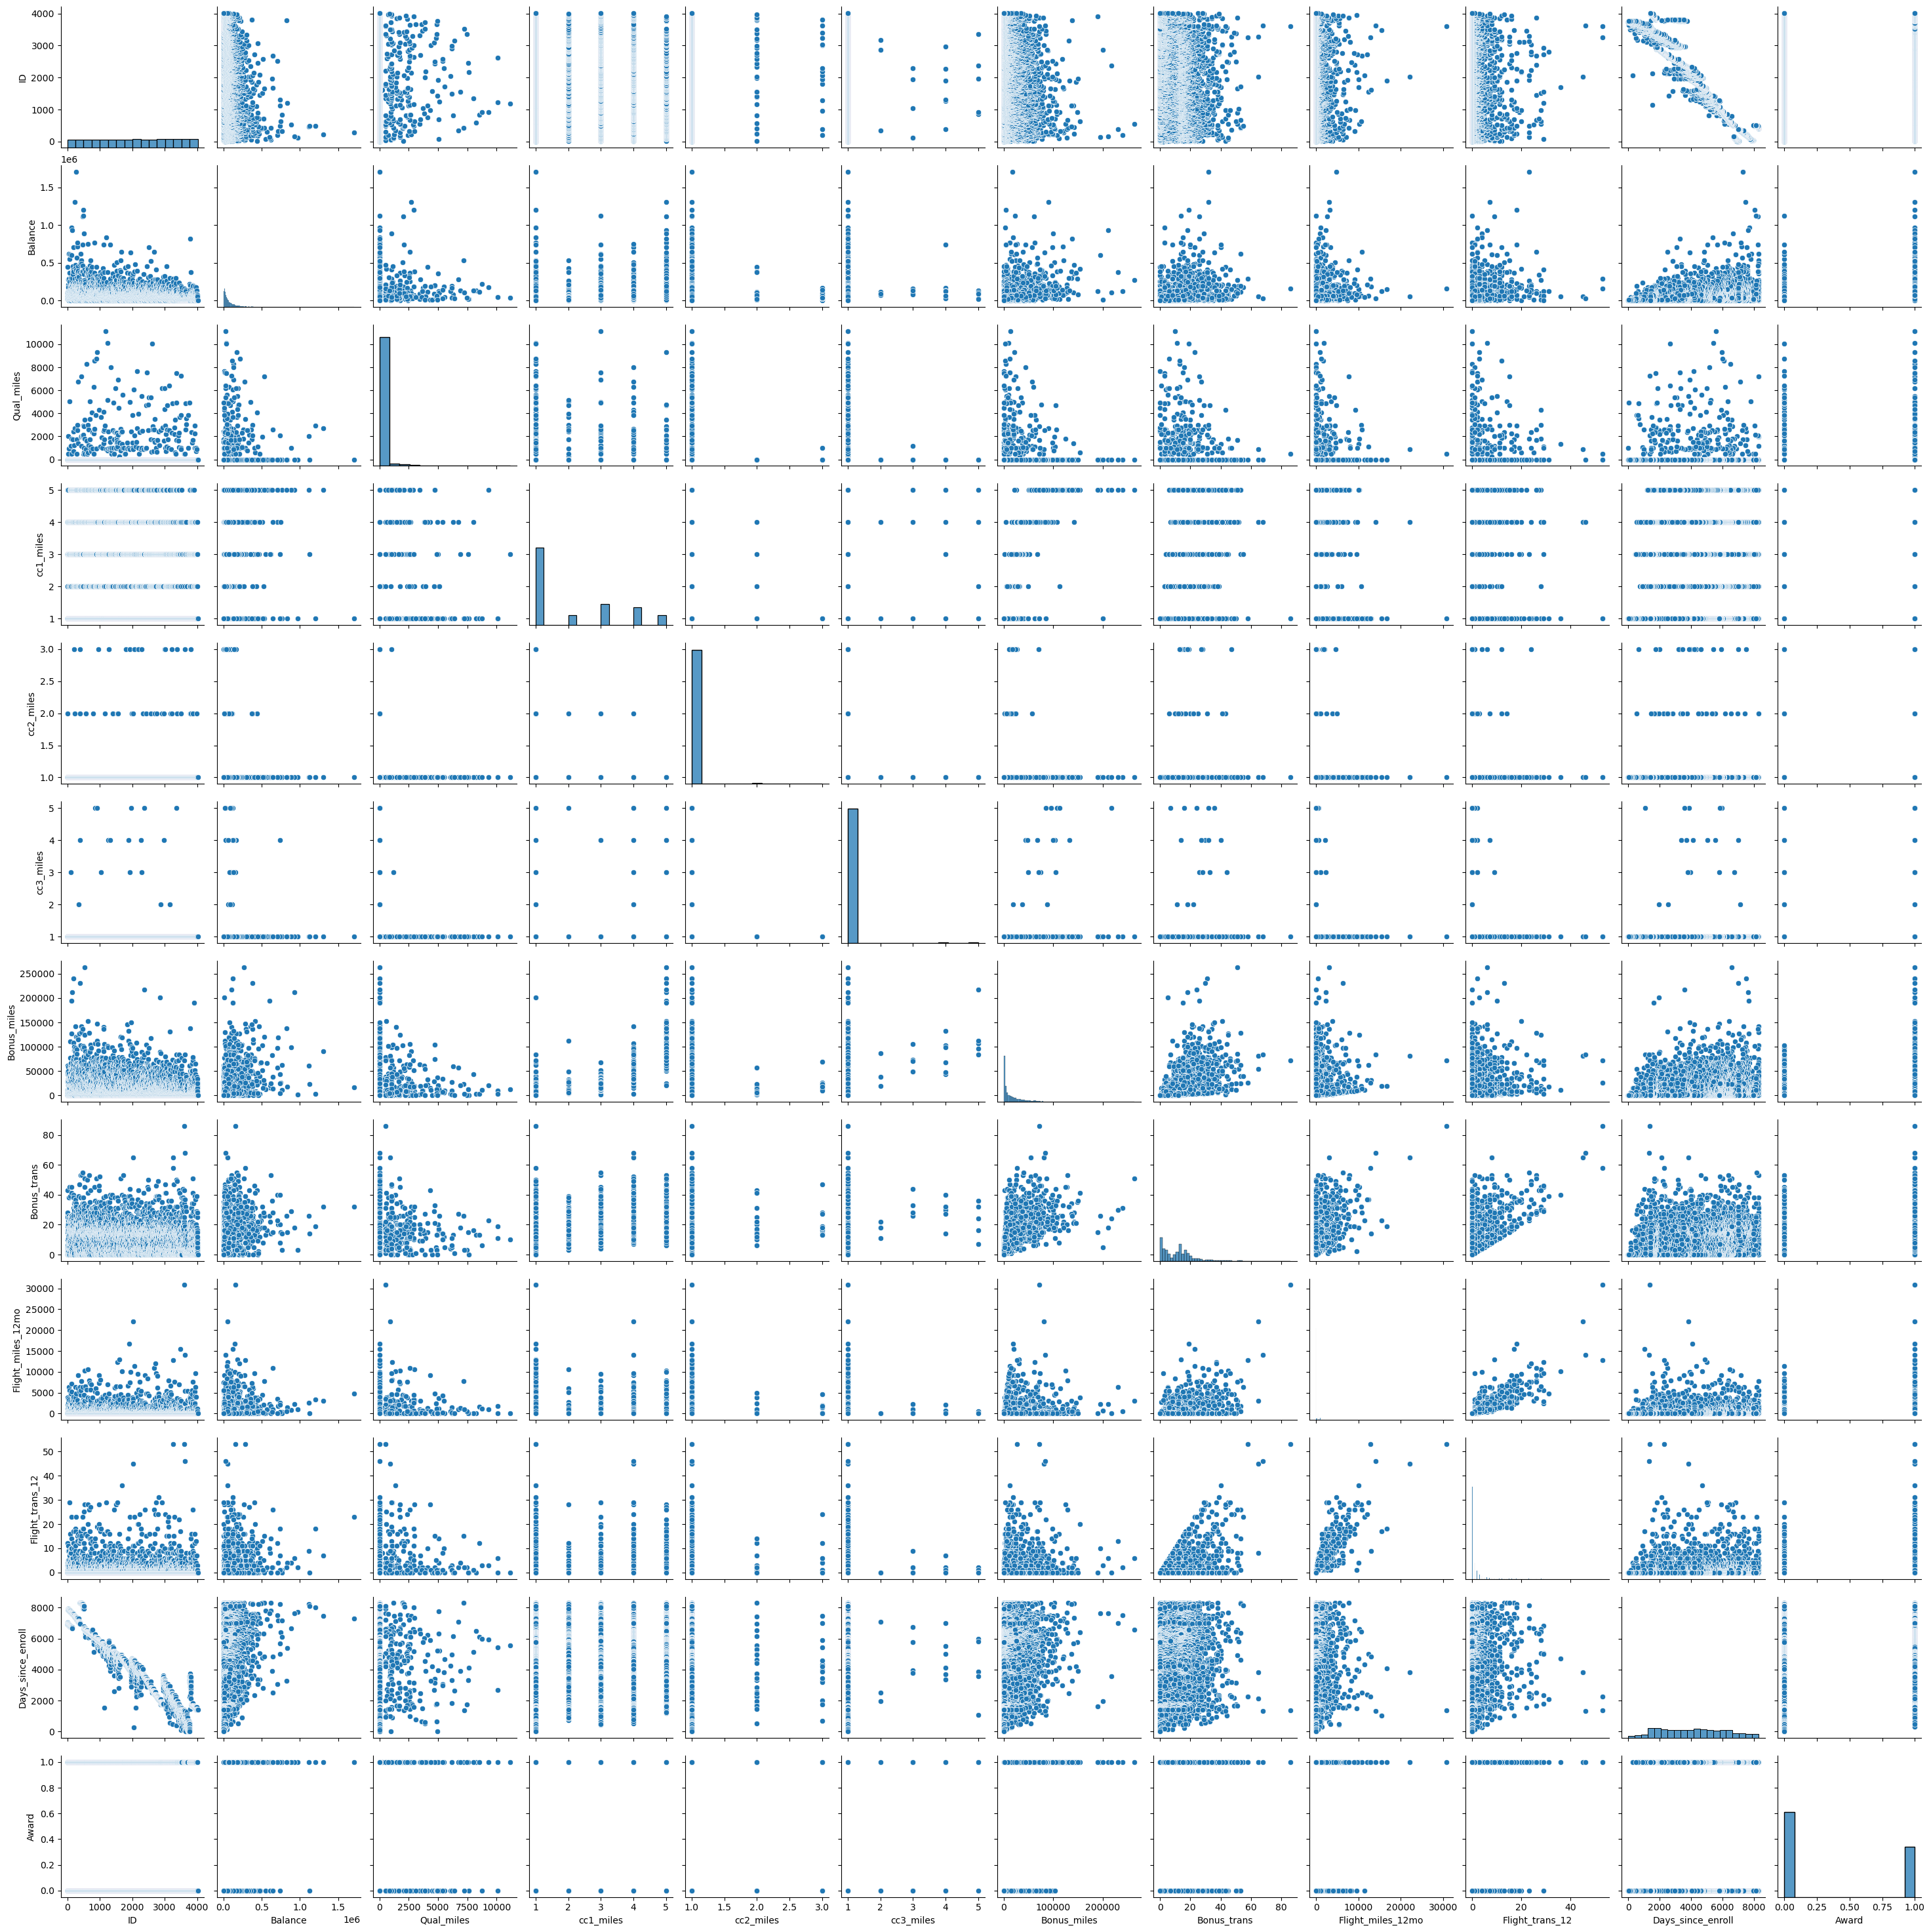

In [22]:
col_names= Data.columns
sns.pairplot(Data)

In [23]:
#from above plots its showing some relationship between the features.

In [24]:
# we will apply the correlation  and if the correlation score is more than abs of 0.7 those feature will be removed from the data

In [25]:
Data.corr()

ID   Balance  Qual_miles  cc1_miles  cc2_miles  \
ID                 1.000000 -0.243737   -0.019374  -0.224465   0.020291   
Balance           -0.243737  1.000000    0.108722   0.338344  -0.008804   
Qual_miles        -0.019374  0.108722    1.000000   0.007931  -0.013923   
cc1_miles         -0.224465  0.338344    0.007931   1.000000  -0.068223   
cc2_miles          0.020291 -0.008804   -0.013923  -0.068223   1.000000   
cc3_miles         -0.014707  0.035243   -0.007779   0.060555  -0.006166   
Bonus_miles       -0.203012  0.403487    0.031021   0.825200  -0.003969   
Bonus_trans       -0.146915  0.324935    0.050725   0.608943   0.064399   
Flight_miles_12mo -0.031013  0.217551    0.126774   0.037370   0.010598   
Flight_trans_12   -0.052096  0.255700    0.144004   0.041333   0.028284   
Days_since_enroll -0.964988  0.263129    0.017312   0.230849  -0.005807   
Award             -0.177901  0.178494    0.095256   0.335457   0.005332   

                   cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
ID                 -0.014707    -0.203012    -0.146915          -0.031013   
Balance             0.035243     0.403487     0.324935           0.217551   
Qual_miles         -0.007779     0.031021     0.050725           0.126774   
cc1_miles           0.060555     0.825200     0.608943           0.037370   
cc2_miles          -0.006166    -0.003969     0.064399           0.010598   
cc3_miles           1.000000     0.204134     0.097313          -0.001777   
Bonus_miles         0.204134     1.000000     0.603180           0.183536   
Bonus_trans         0.097313     0.603180     1.000000           0.377216   
Flight_miles_12mo  -0.001777     0.183536     0.377216           1.000000   
Flight_trans_12    -0.001117     0.185261     0.432364           0.869193   
Days_since_enroll   0.010832     0.210397     0.161262           0.037271   
Award               0.023484     0.373506     0.333893           0.217715   

                   Flight_trans_12  Days_since_enroll     Award  
ID                       -0.052096          -0.964988 -0.177901  
Balance                   0.255700           0.263129  0.178494  
Qual_miles                0.144004           0.017312  0.095256  
cc1_miles                 0.041333           0.230849  0.335457  
cc2_miles                 0.028284          -0.005807  0.005332  
cc3_miles                -0.001117           0.010832  0.023484  
Bonus_miles               0.185261           0.210397  0.373506  
Bonus_trans               0.432364           0.161262  0.333893  
Flight_miles_12mo         0.869193           0.037271  0.217715  
Flight_trans_12           1.000000           0.059260  0.247909  
Days_since_enroll         0.059260           1.000000  0.188121  
Award                     0.247909           0.188121  1.000000

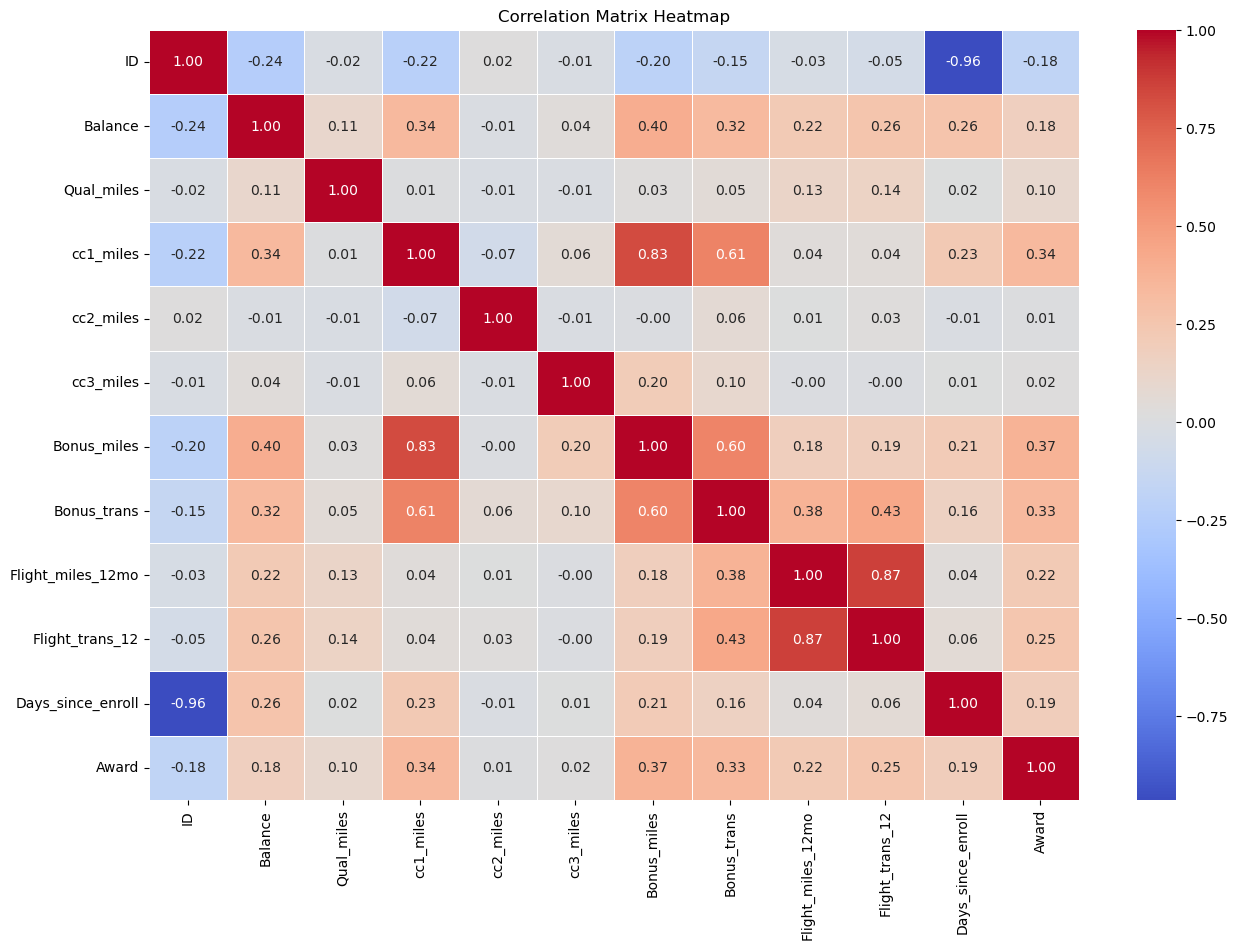

In [26]:
# Compute the correlation matrix
corr_matrix = Data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Ensure that the annotations are properly displayed
for text in heatmap.texts:
    text.set_size(10)  # Adjust the text size if necessary

# Add title to the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show() 

In [27]:
# Set the threshold for filtering correlations
threshold = 0.7

# Find pairs of variables with correlation greater than the threshold
high_corr_pairs = corr_matrix[(corr_matrix.abs() > threshold) & (corr_matrix != 1)]

# Print the pairs of variables with their correlation values
print("Pairs of variables with correlation greater than 0.7:")
for i in range(len(high_corr_pairs.columns)):
    for j in range(i):
        if high_corr_pairs.iloc[i, j] > threshold:
            print(f"{high_corr_pairs.columns[i]} and {high_corr_pairs.index[j]}: {high_corr_pairs.iloc[i, j]:.2f}")

Pairs of variables with correlation greater than 0.7:
Bonus_miles and cc1_miles: 0.83
Flight_trans_12 and Flight_miles_12mo: 0.87


In [28]:
# from the data we will remove the ID,CC1_miles and Flight_miles_12mo. 

In [29]:
filter_data= Data.drop(['ID','cc1_miles','Flight_miles_12mo'],axis=1)

In [30]:
filter_data.head()

Balance  Qual_miles  cc2_miles  cc3_miles  Bonus_miles  Bonus_trans  \
0    28143           0          1          1          174            1   
1    19244           0          1          1          215            2   
2    41354           0          1          1         4123            4   
3    14776           0          1          1          500            1   
4    97752           0          1          1        43300           26   

   Flight_trans_12  Days_since_enroll  Award  
0                0               7000      0  
1                0               6968      0  
2                0               7034      0  
3                0               6952      0  
4                4               6935      1

In [31]:
# Function to calculate the percentage of outliers using the IQR method
def calculate_outlier_percentage(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    percentage = (len(outliers) / len(column)) * 100
    return percentage

# Calculate the percentage of outliers for each column
outlier_percentages = filter_data.apply(calculate_outlier_percentage)

# Print the percentage of outliers for each column
print("Percentage of outliers in each column:")
print(outlier_percentages)

Percentage of outliers in each column:
Balance               6.651663
Qual_miles            5.651413
cc2_miles             1.075269
cc3_miles             0.450113
Bonus_miles           7.001750
Bonus_trans           1.575394
Flight_trans_12      14.128532
Days_since_enroll     0.000000
Award                 0.000000
dtype: float64


### Before outlier treatment and normalization of the data. Apply the KNN to see how cluster works

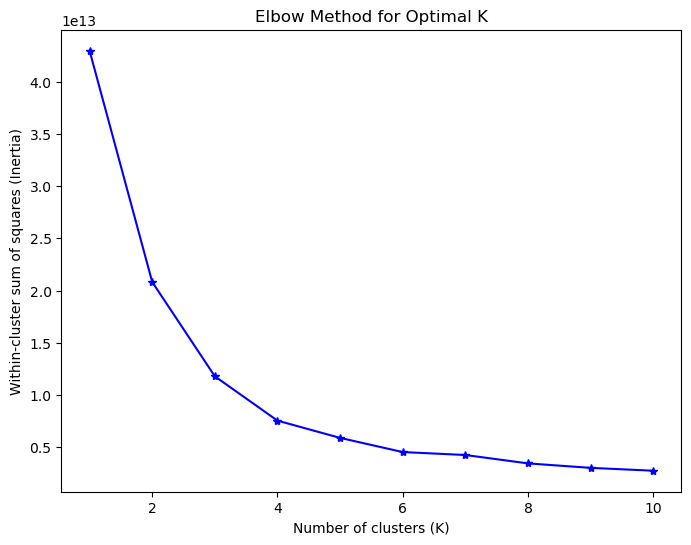

In [92]:
# Calculate the within-cluster sum of squares for a range of values of K
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Calculate the within-cluster sum of squares for a range of values of K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(filter_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'b*-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-cluster sum of squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

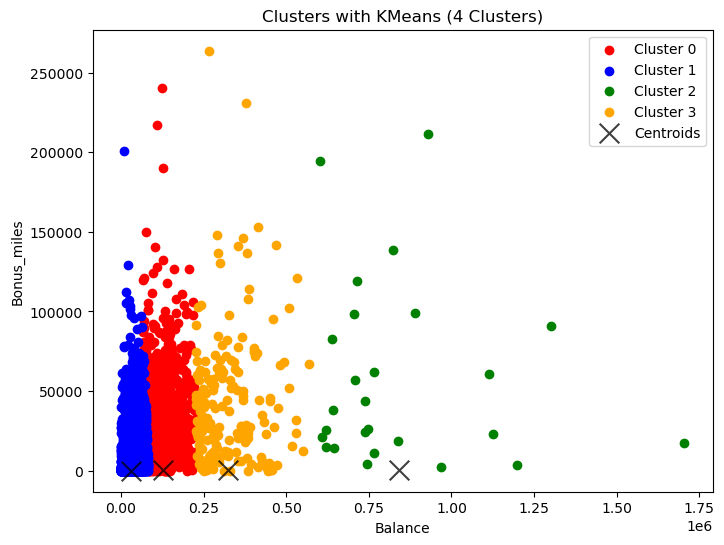

In [34]:
#minimum 4 cluster will be good option.

# Fit KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=36, n_init=10)
filter_data['Cluster'] = kmeans.fit_predict(filter_data)

# Plot the clusters with different colors
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange']
for cluster in range(4):
    cluster_data = filter_data[filter_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Balance'], cluster_data['Bonus_miles'], color=colors[cluster], label=f'Cluster {cluster}')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, marker='x', label='Centroids')

plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.title('Clusters with KMeans (4 Clusters)')
plt.legend()
plt.show()

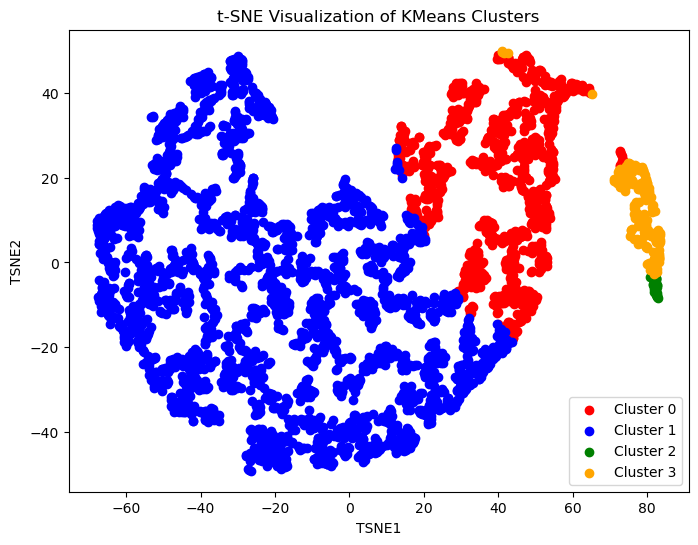

In [35]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensions to 2 for visualization
tsne = TSNE(n_components=2, random_state=36)
tsne_results = tsne.fit_transform(filter_data)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = filter_data['Cluster']

# Plot the t-SNE results with different colors for each cluster
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange']
for cluster in range(4):
    cluster_data = tsne_df[tsne_df['Cluster'] == cluster]
    plt.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], color=colors[cluster], label=f'Cluster {cluster}')

# Add title and labels
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('t-SNE Visualization of KMeans Clusters')
plt.legend()
plt.show()

In [36]:
#building template to apply kmeans and display the cluster of 4.
def kmean_fit_display_tsne_redu(df):
    # Fit KMeans model with 4 clusters
    kmeans = KMeans(n_clusters=4, random_state=36, n_init=10)
    df['Cluster'] = kmeans.fit_predict(df)
        
        # Apply t-SNE to reduce the dimensions to 2 for visualization
    tsne = TSNE(n_components=2, random_state=36)
    tsne_results = tsne.fit_transform(df)
    
    # Create a DataFrame with the t-SNE results
    tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
    tsne_df['Cluster'] = df['Cluster']
    
    # Plot the t-SNE results with different colors for each cluster
    plt.figure(figsize=(8, 6))
    colors = ['red', 'blue', 'green', 'orange']
    for cluster in range(4):
        cluster_data = tsne_df[tsne_df['Cluster'] == cluster]
        plt.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], color=colors[cluster], label=f'Cluster {cluster}')
    
    # Add title and labels
    plt.xlabel('TSNE1')
    plt.ylabel('TSNE2')
    plt.title('t-SNE Visualization of KMeans Clusters')
    plt.legend()
    plt.show()

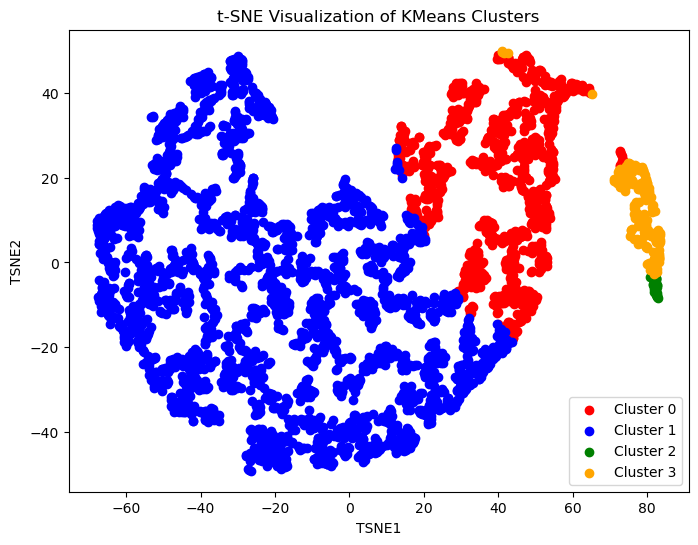

In [37]:
kmean_fit_display_tsne_redu(filter_data)

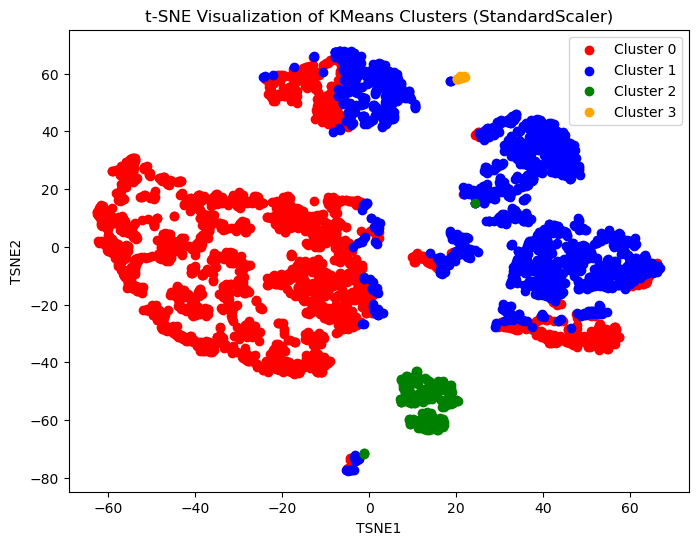

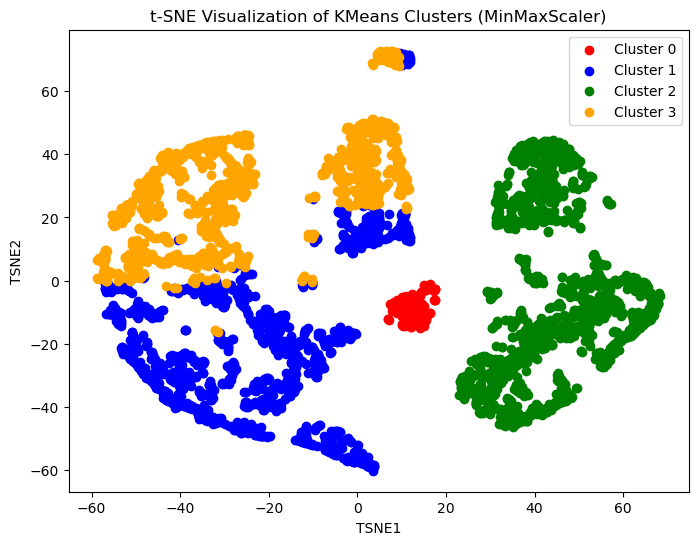

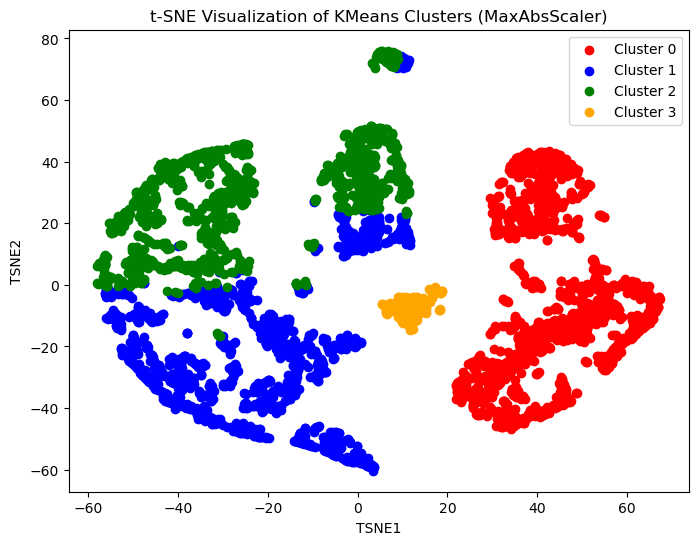

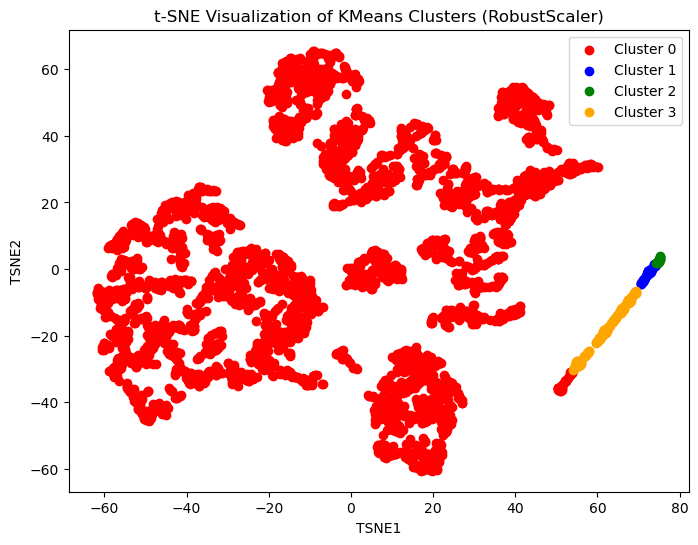

In [38]:
#applying the normalization and checking the clusters


from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

# Function to apply KMeans and visualize with t-SNE
def apply_kmeans_and_tsne(data, scaler, title):
    # Normalize the data
    scaled_data = scaler.fit_transform(data)
    
    # Fit KMeans model with 4 clusters
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Apply t-SNE to reduce the dimensions to 2 for visualization
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(scaled_data)
    
    # Create a DataFrame with the t-SNE results
    tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
    tsne_df['Cluster'] = clusters
    
    # Plot the t-SNE results with different colors for each cluster
    plt.figure(figsize=(8, 6))
    colors = ['red', 'blue', 'green', 'orange']
    for cluster in range(4):
        cluster_data = tsne_df[tsne_df['Cluster'] == cluster]
        plt.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], color=colors[cluster], label=f'Cluster {cluster}')
    
    # Add title and labels
    plt.xlabel('TSNE1')
    plt.ylabel('TSNE2')
    plt.title(title)
    plt.legend()
    plt.show()

# Apply different normalization techniques and visualize
apply_kmeans_and_tsne(filter_data, StandardScaler(), 't-SNE Visualization of KMeans Clusters (StandardScaler)')
apply_kmeans_and_tsne(filter_data, MinMaxScaler(), 't-SNE Visualization of KMeans Clusters (MinMaxScaler)')
apply_kmeans_and_tsne(filter_data, MaxAbsScaler(), 't-SNE Visualization of KMeans Clusters (MaxAbsScaler)')
apply_kmeans_and_tsne(filter_data, RobustScaler(), 't-SNE Visualization of KMeans Clusters (RobustScaler)')

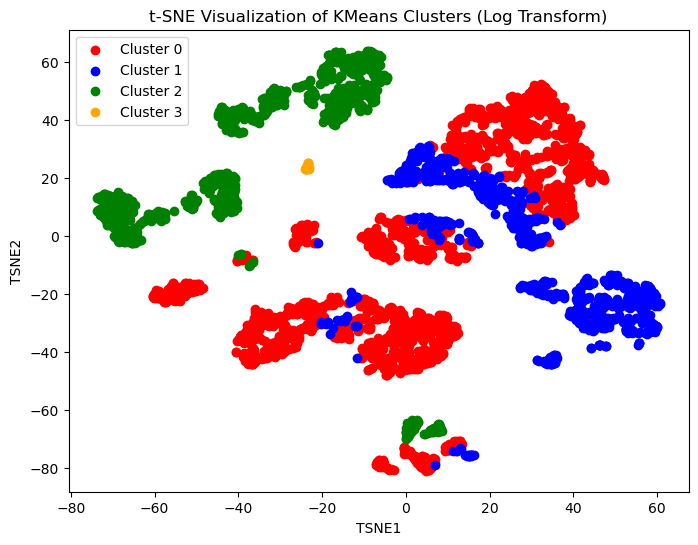

In [39]:
# Function to apply log transformation and handle negative values
def log_transform(data):
    # Shift the data to be positive
    shifted_data = data - data.min() + 1
    # Apply log transformation
    return np.log(shifted_data)

#Apply log transformation and visualize
log_transformed_data = log_transform(filter_data)
apply_kmeans_and_tsne(log_transformed_data, StandardScaler(), 't-SNE Visualization of KMeans Clusters (Log Transform)')

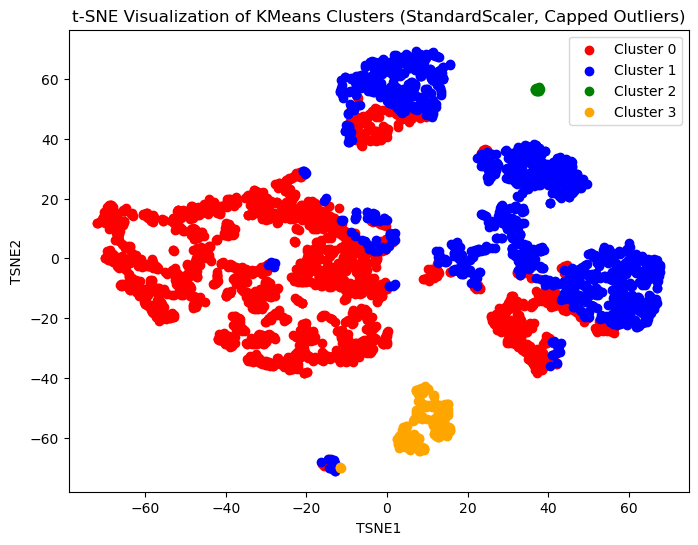

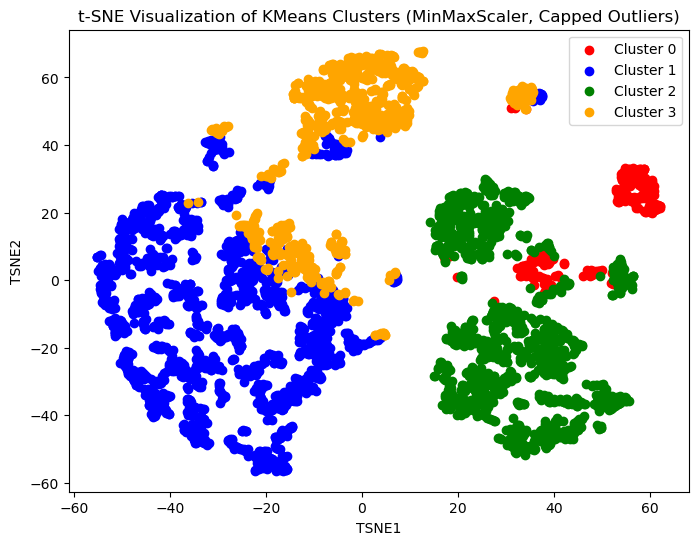

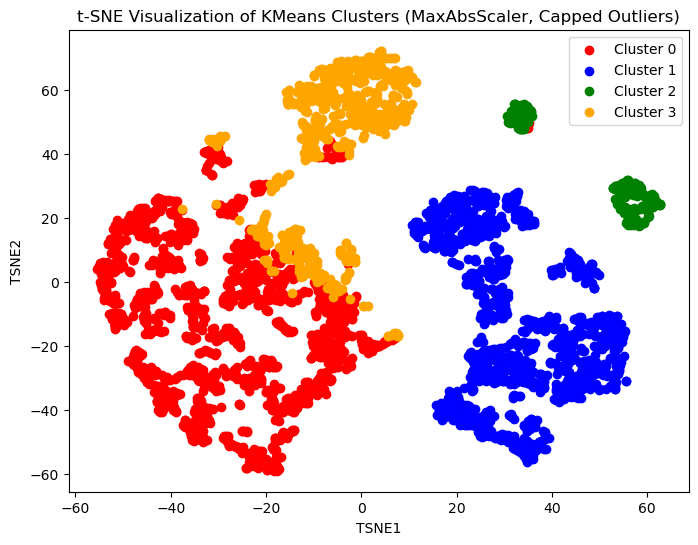

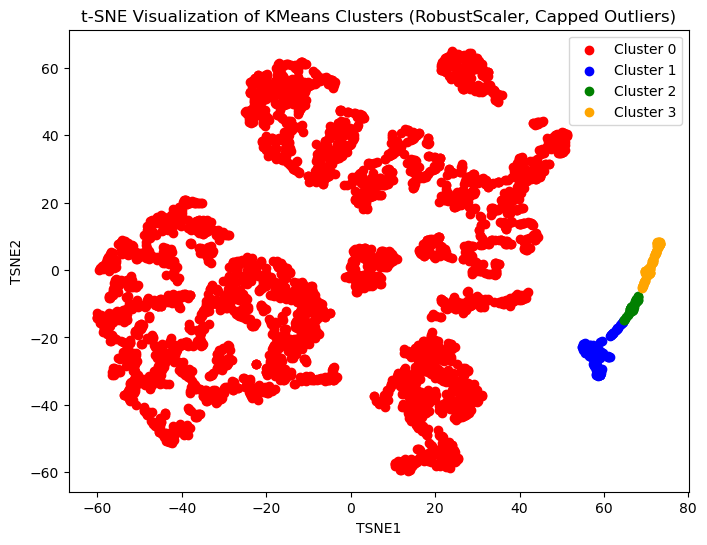

In [40]:
# Function to apply outlier treatment by capping
def cap_outliers(data, cap_value):
    capped_data = data.copy()
    for column in capped_data.columns:
        upper_limit = capped_data[column].mean() + cap_value * capped_data[column].std()
        lower_limit = capped_data[column].mean() - cap_value * capped_data[column].std()
        capped_data[column] = np.where(capped_data[column] > upper_limit, upper_limit, capped_data[column])
        capped_data[column] = np.where(capped_data[column] < lower_limit, lower_limit, capped_data[column])
    return capped_data

# Apply outlier treatment
capped_data = cap_outliers(filter_data, 3)

# Apply different normalization techniques and visualize
apply_kmeans_and_tsne(capped_data, StandardScaler(), 't-SNE Visualization of KMeans Clusters (StandardScaler, Capped Outliers)')
apply_kmeans_and_tsne(capped_data, MinMaxScaler(), 't-SNE Visualization of KMeans Clusters (MinMaxScaler, Capped Outliers)')
apply_kmeans_and_tsne(capped_data, MaxAbsScaler(), 't-SNE Visualization of KMeans Clusters (MaxAbsScaler, Capped Outliers)')
apply_kmeans_and_tsne(capped_data, RobustScaler(), 't-SNE Visualization of KMeans Clusters (RobustScaler, Capped Outliers)')

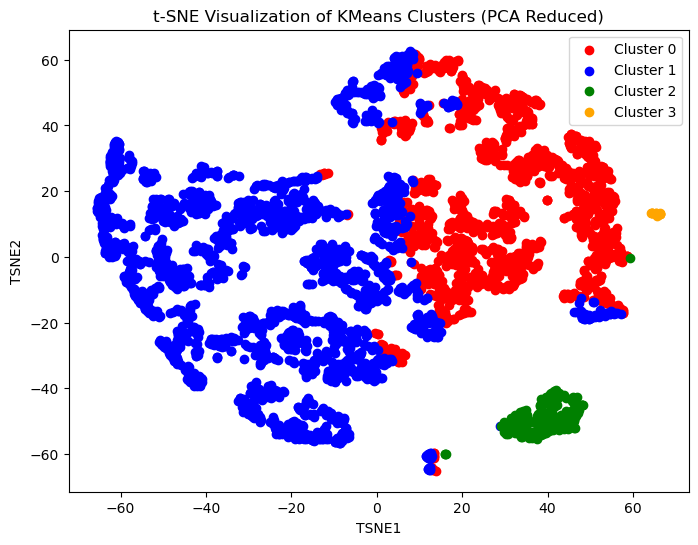

In [41]:
from sklearn.decomposition import PCA

# Function to apply PCA for dimensionality reduction
def apply_pca(data, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

# Function to apply KMeans and visualize with t-SNE
def apply_kmeans_and_tsne(data, title):
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Reduce dimensions using PCA
    pca_data = apply_pca(scaled_data, n_components=5)  # Reduce to 5 components for clustering
    
    # Fit KMeans model with 4 clusters
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(pca_data)
    
    # Apply t-SNE to further reduce the dimensions to 2 for visualization
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(pca_data)
    
    # Create a DataFrame with the t-SNE results
    tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
    tsne_df['Cluster'] = clusters
    
    # Plot the t-SNE results with different colors for each cluster
    plt.figure(figsize=(8, 6))
    colors = ['red', 'blue', 'green', 'orange']
    for cluster in range(4):
        cluster_data = tsne_df[tsne_df['Cluster'] == cluster]
        plt.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], color=colors[cluster], label=f'Cluster {cluster}')
    
    # Add title and labels
    plt.xlabel('TSNE1')
    plt.ylabel('TSNE2')
    plt.title(title)
    plt.legend()
    plt.show()

# Apply PCA, KMeans, and t-SNE, and visualize
apply_kmeans_and_tsne(filter_data, 't-SNE Visualization of KMeans Clusters (PCA Reduced)')

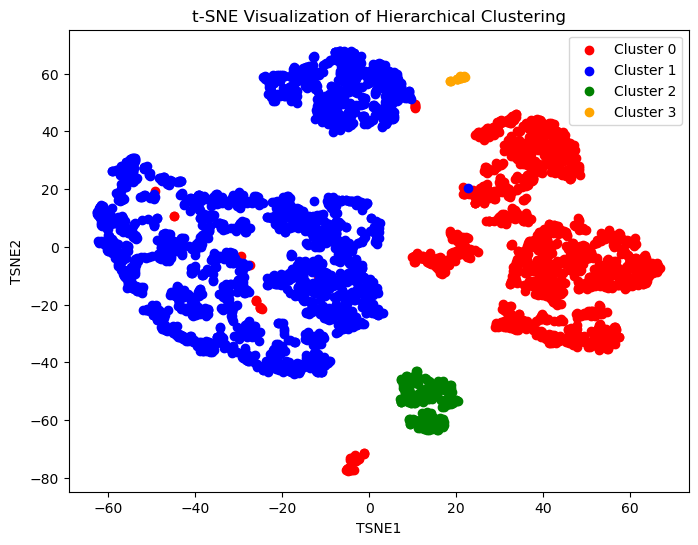

In [42]:
#Hiearchical clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Creating a sample DataFrame with 10 columns and 100 rows
np.random.seed(42)
data = {f'col{i+1}': np.random.randn(100) for i in range(10)}
df = pd.DataFrame(data)

# Function to apply hierarchical clustering and visualize with t-SNE
def apply_hierarchical_and_tsne(data, title):
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Apply hierarchical clustering
    hierarchical = AgglomerativeClustering(n_clusters=4)
    clusters = hierarchical.fit_predict(scaled_data)
    
    # Apply t-SNE to reduce the dimensions to 2 for visualization
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(scaled_data)
    
    # Create a DataFrame with the t-SNE results
    tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
    tsne_df['Cluster'] = clusters
    
    # Plot the t-SNE results with different colors for each cluster
    plt.figure(figsize=(8, 6))
    colors = ['red', 'blue', 'green', 'orange']
    for cluster in range(4):
        cluster_data = tsne_df[tsne_df['Cluster'] == cluster]
        plt.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], color=colors[cluster], label=f'Cluster {cluster}')
    
    # Add title and labels
    plt.xlabel('TSNE1')
    plt.ylabel('TSNE2')
    plt.title(title)
    plt.legend()
    plt.show()

# Apply hierarchical clustering and t-SNE, and visualize
apply_hierarchical_and_tsne(filter_data, 't-SNE Visualization of Hierarchical Clustering')


C:\Users\SAIKRISHNA\AppData\Local\Temp\ipykernel_24476\1626355238.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_clusters))


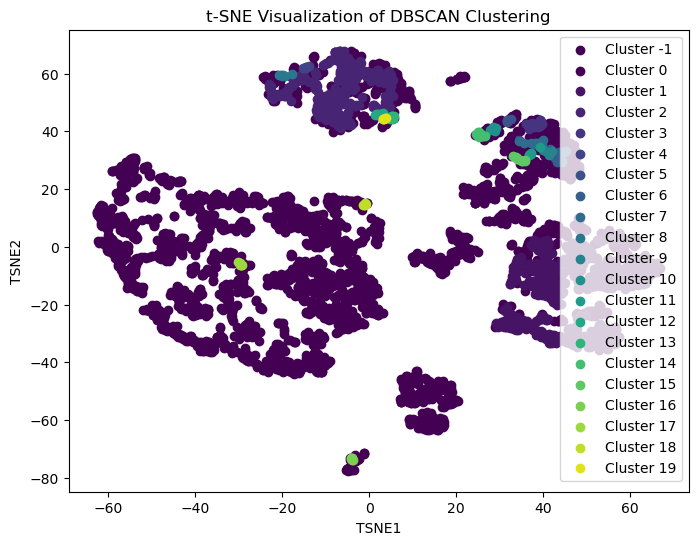

In [43]:
from sklearn.cluster import DBSCAN

# Function to apply DBSCAN and visualize with t-SNE
def apply_dbscan_and_tsne(data, title):
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Apply DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    clusters = dbscan.fit_predict(scaled_data)
    
    # Apply t-SNE to reduce the dimensions to 2 for visualization
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(scaled_data)
    
    # Create a DataFrame with the t-SNE results
    tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
    tsne_df['Cluster'] = clusters
    
    # Plot the t-SNE results with different colors for each cluster
    plt.figure(figsize=(8, 6))
    unique_clusters = np.unique(clusters)
    colors = plt.cm.get_cmap('viridis', len(unique_clusters))
    for cluster in unique_clusters:
        cluster_data = tsne_df[tsne_df['Cluster'] == cluster]
        plt.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], color=colors(cluster), label=f'Cluster {cluster}')
    
    # Add title and labels
    plt.xlabel('TSNE1')
    plt.ylabel('TSNE2')
    plt.title(title)
    plt.legend()
    plt.show()

# Apply DBSCAN and t-SNE, and visualize
apply_dbscan_and_tsne(filter_data, 't-SNE Visualization of DBSCAN Clustering')


C:\Users\SAIKRISHNA\AppData\Local\Temp\ipykernel_24476\1156827871.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_clusters))


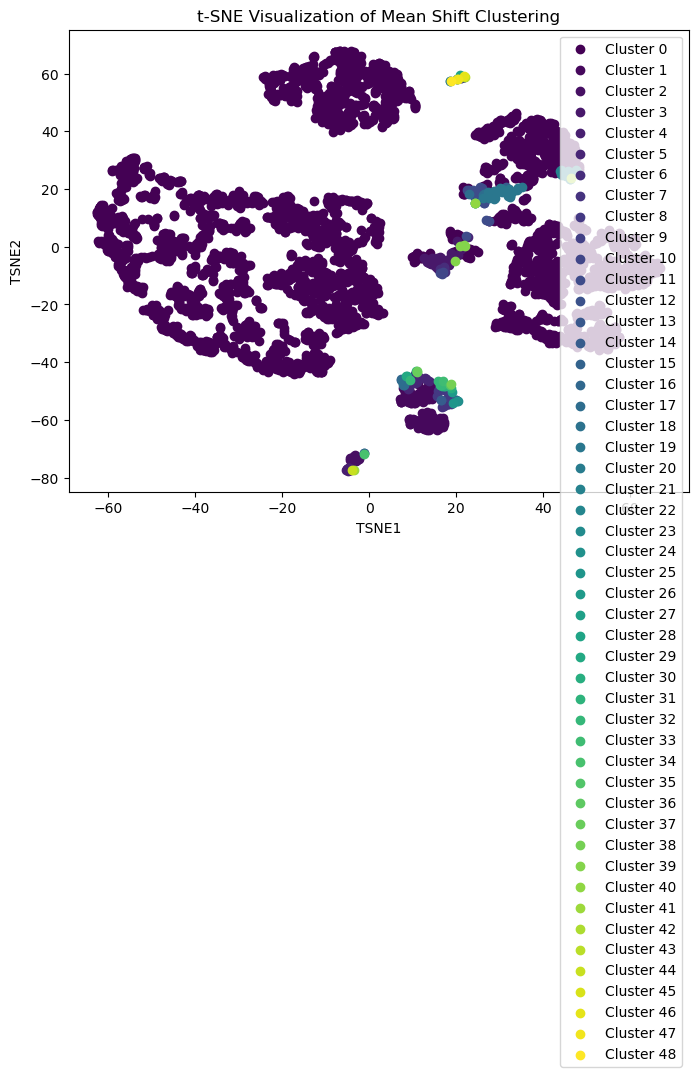

In [44]:
from sklearn.cluster import MeanShift

# Function to apply Mean Shift and visualize with t-SNE
def apply_meanshift_and_tsne(data, title):
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Apply Mean Shift
    meanshift = MeanShift()
    clusters = meanshift.fit_predict(scaled_data)
    
    # Apply t-SNE to reduce the dimensions to 2 for visualization
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(scaled_data)
    
    # Create a DataFrame with the t-SNE results
    tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
    tsne_df['Cluster'] = clusters
    
    # Plot the t-SNE results with different colors for each cluster
    plt.figure(figsize=(8, 6))
    unique_clusters = np.unique(clusters)
    colors = plt.cm.get_cmap('viridis', len(unique_clusters))
    for cluster in unique_clusters:
        cluster_data = tsne_df[tsne_df['Cluster'] == cluster]
        plt.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], color=colors(cluster), label=f'Cluster {cluster}')
    
    # Add title and labels
    plt.xlabel('TSNE1')
    plt.ylabel('TSNE2')
    plt.title(title)
    plt.legend()
    plt.show()

# Apply Mean Shift and t-SNE, and visualize
apply_meanshift_and_tsne(filter_data, 't-SNE Visualization of Mean Shift Clustering')


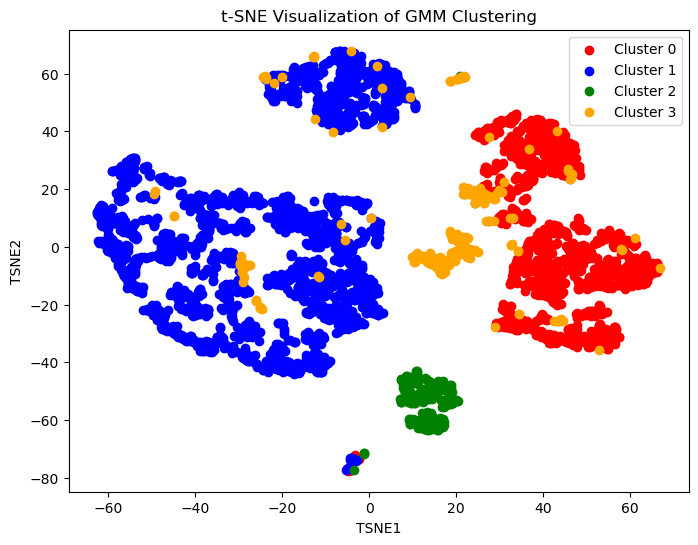

In [45]:
from sklearn.mixture import GaussianMixture

# Function to apply GMM and visualize with t-SNE
def apply_gmm_and_tsne(data, title):
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Apply GMM
    gmm = GaussianMixture(n_components=4, random_state=42)
    clusters = gmm.fit_predict(scaled_data)
    
    # Apply t-SNE to reduce the dimensions to 2 for visualization
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(scaled_data)
    
    # Create a DataFrame with the t-SNE results
    tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
    tsne_df['Cluster'] = clusters
    
    # Plot the t-SNE results with different colors for each cluster
    plt.figure(figsize=(8, 6))
    colors = ['red', 'blue', 'green', 'orange']
    for cluster in range(4):
        cluster_data = tsne_df[tsne_df['Cluster'] == cluster]
        plt.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], color=colors[cluster], label=f'Cluster {cluster}')
    
    # Add title and labels
    plt.xlabel('TSNE1')
    plt.ylabel('TSNE2')
    plt.title(title)
    plt.legend()
    plt.show()

# Apply GMM and t-SNE, and visualize
apply_gmm_and_tsne(filter_data, 't-SNE Visualization of GMM Clustering')
